## Linear Regression on Stock Values

In [1]:
import pandas as pd
import quandl

df = quandl.get("WIKI/GOOGL")
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [2]:
#Thus, let's go ahead and pair down our original dataframe a bit:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]

# Let's go ahead and transform our data next:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0

#Next, we'll do daily percent change:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.

#Now we will define a new dataframe as:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.072956    0.324968   44659000.0
2004-08-20   54.322689  7.921706    7.227007   22834300.0
2004-08-23   54.869377  4.049360   -1.227880   18256100.0
2004-08-24   52.597363  7.657099   -5.726357   15247300.0
2004-08-25   53.164113  3.886792    1.183658    9188600.0


In [3]:
#Regression - Features and Labels
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

In [4]:
#math.ceil(x)
#Return the ceiling of x as a float,
#the smallest integer value greater than or equal to x.

#Forcost, fill missing data and return ceiling as float, smallest integer values
#greater than or equal to x
#In our case, we've decided the features are a bunch of the current values, and the label shall be the price, in the future, where the future is 1% of the entire length of the dataset out. We'll assume all current columns are our features,
#so we'll add a new column with a simple pandas operation:
#We're saying we want to forecast out 1% of the entire length of the dataset
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))


#In our case, we've decided the features are a bunch of the current values,
#and the label shall be the price, in the future, where the future is 1% of the entire length of the dataset out.
#We'll assume all current columns are our features, so we'll add a new column with a simple pandas operation:

df['label'] = df[forecast_col].shift(-forecast_out)


#Regression - Training and Testing
#We'll then drop any still NaN information from the dataframe:







#df.dropna(inplace=True)       
#X = np.array(df.drop(['label'], 1))
#y = np.array(df['label'])
#X = preprocessing.scale(X)
#y = np.array(df['label'])
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#clf = svm.SVR()
#clf = LinearRegression()
#clf.fit(X_train, y_train)
#confidence = clf.score(X_test, y_test)
#print(confidence)
#clf = LinearRegression()
#clf = LinearRegression(n_jobs=-1)
#for k in ['linear','poly','rbf','sigmoid']:
#    clf = svm.SVR(kernel=k)
#    clf.fit(X_train, y_train)
#   confidence = clf.score(X_test, y_test)
#    print(k,confidence)
#Predict
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

forecast_set = clf.predict(X_lately)
print(forecast_set, confidence, forecast_out)

0.9765882232372238
[1101.23537283 1073.27529277 1020.28451967 1059.25213122 1073.5238798
 1074.07251019 1091.96554141 1110.69562034 1115.48473166 1123.19004896
 1133.07185037 1129.86966829 1148.48982968 1164.58251445 1136.59894507
 1123.02330276 1088.38456476 1102.6201668  1114.22548915 1121.61245756
 1134.93053845 1150.16380096 1180.9588332  1186.38660204 1158.05444602
 1169.34425705 1170.56275415 1153.6751563  1118.47242403 1114.99254694
 1113.611082   1070.50907919 1043.41226174 1070.77509108 1021.02103386] 0.9765882232372238 35


## Visualizing Above Information

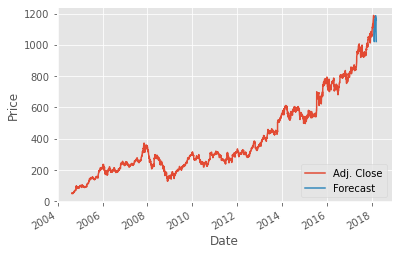

In [5]:
#visualizing this information
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
df['Forecast'] = np.nan


last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()